In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import math
print("hello")

hello


In [145]:
txt='DataFile_g07_Ut1.csv'
df=pd.read_csv(txt)
data=df.to_numpy()

In [146]:
print(data[1][0])
print(data[1][1])

grid={}
N=100
for i in range (0,N):
    grid[i]=0
print(grid)
Lz=1
Ua=0.001

1.0
2.0
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0}


In [147]:
def Russian(W):
    e=random.uniform(0,1)
    m=10
    if (e<1/m):
        return W*m
    return 0

In [148]:
def GridAbsorption(start, end, W0, Uz):
    global grid, Ua, Lz, N
    index=int(start)
    dz=Lz/N
    if (end-start>0):
        while (index<end and W0>0.001):
            w=W0*np.exp(-Ua*dz/Uz)
            if (W0<0.00001):
                    w=0
            
            if (math.isnan(grid[index])):
                print("OMG + end-start:", end-start)
            grid[index]+=W0-w
            if (math.isnan(grid[index])):
                print("##", W0, w, index, grid[index])
                print(start, end)
            W0=w
            index+=1
            if (W0<0.001):
                W0=Russian(W0)
    else:
        index=int(start)-1
        while (index>=end and W0>0.001):
            w=W0*np.exp(-Ua*dz/Uz)
            if (W0<0.00001):
                    w=0
            if (math.isnan(grid[index])):
                print("OMG + end-start:", end-start)
            grid[index]+=W0-w
            if (math.isnan(grid[index])):
                print("##", W0, w, index, grid[index])
                print(start, end)
            W0=w
            index = index-1
            if (W0<0.001):
                W0=Russian(W0)
    return W0

In [152]:

for i in range(0,1000000):
    hit=int(data[i][1])
    W0=1
    for j in range(0,hit-1):
        z1=data[i][2+3*j]
        z2=data[i][2+(j+1)*3]
        s=np.sqrt((data[i][2+j*3]-data[i][2+(j+1)*3])**2 + (data[i][3+j*3]-data[i][3+(j+1)*3])**2 + (data[i][4+j*3] - data[i][4+(j+1)*3])**2)
        Uz=abs(np.sqrt((data[i][2+3*j]-data[i][2+(j+1)*3])**2)/s)
        #print(grid)
        if (z1<z2):
            I1=math.ceil(z1*N)
            if (I1<0.0001):
                I1=1
            I2=math.floor(z2*N)
            if (I2==100):
                I2=99
            if (I1<I2):
                s_start=(I1/N-z1)/(Uz)
                w=W0*np.exp(-Ua*s_start)
                if (W0<0.00001):
                    w=0
                grid[I1-1]+=W0-w
                W0=GridAbsorption(I1, I2, w, Uz)
                w=W0*np.exp(-Ua*(z2-I2/N)/Uz)
                if (W0<0.00001):
                    w=0
                grid[I2]+=W0-w
                W0=w
            elif (I1>I2):
                w=W0*np.exp(-Ua*s)
                if (W0<0.00001):
                    w=0
                grid[I2]+=W0-w
                W0=w
            else:
                s_start=(I1/N-z1)/Uz
                w=W0*np.exp(-Ua*s_start)
                if (W0<0.00001):
                    w=0
                grid[I1-1]=W0-w
                W0=w
                w=W0*np.exp(-Ua*(s-s_start))
                if (W0<0.00001):
                    w=0
                grid[I2]=W0-w
                W0=w
            if (W0<0.001):
                if (Russian(W0)<0.001):
                    break
        elif (z1>z2):
            I1=math.floor(z1*N)
            if (I1==N):
                I1=N-1
            I2=math.ceil(z2*N)
            if (I2<0.001):
                I2=1
            if (I1>I2):
                s_start=(z1 - I1/N)/Uz
                w=W0*np.exp(-Ua*s_start)
                if (W0<0.00001):
                    w=0
                grid[I1]+=W0-w
                W0=GridAbsorption(I1, I2, w, Uz)
                w=W0*np.exp(-Ua*abs((I2/N-z2)/Uz))
                if (W0<0.00001):
                    w=0
                grid[I2-1]+=W0-w
                W0=w
            elif (I2>I1):
                w=W0*np.exp(-Ua*s)
                if (W0<0.00001):
                    w=0
                grid[I1]+=W0-w
                W0=w
            else:
                s_start=(z1 - I1/N)/Uz
                w=W0*np.exp(-Ua*s_start)
                if (W0<0.00001):
                    w=0
                grid[I1]+=W0-w
                W0=w
                w=W0*np.exp(-Ua*(s-s_start))
                if (W0<0.00001):
                    w=0
                grid[I2-1]+=W0-w
                W0=w
            if (W0<0.001):
                if (Russian(W0)<0.001):
                    break

for i in range (0,N):
    grid[i]=grid[i]/1000000                   

print(grid)



            

{0: 4.099979500070683e-10, 1: 4.100085444401769e-10, 2: 3.5049253528774415e-08, 3: 3.59254202616609e-08, 4: 2.3606753034808635e-08, 5: 3.774455500845986e-09, 6: 3.83403105393576e-09, 7: 9.698367810704433e-09, 8: 1.0088720015573371e-08, 9: 1.0165536766266747e-08, 10: 6.418360694424363e-09, 11: 2.8445053058101522e-11, 12: 4.0507866729488915e-11, 13: 2.481898976973662e-08, 14: 3.3579064917034886e-08, 15: 2.1782855439387294e-08, 16: 1.0327930590508739e-08, 17: 1.005426261009701e-08, 18: 1.0339369927962695e-08, 19: 5.274266544210915e-08, 20: 4.160685243716822e-09, 21: 2.0315985378737132e-09, 22: 2.0324193412220025e-09, 23: 1.077418496723459e-08, 24: 2.9095786235512676e-08, 25: 9.469557468137135e-08, 26: 6.41022357203983e-08, 27: 2.322845311581889e-08, 28: 2.3950182371949903e-08, 29: 4.828575034499527e-08, 30: 4.181718837414983e-08, 31: 1.3649175832531334e-08, 32: 2.4092497180708826e-09, 33: 2.3624001769378957e-09, 34: 4.3756868139194215e-09, 35: 4.4730644016427456e-09, 36: 1.966807034490692

0 4.099979500070683e-10
1 4.100085444401769e-10
2 3.5049253528774415e-08
3 3.59254202616609e-08
4 2.3606753034808635e-08
5 3.774455500845986e-09
6 3.83403105393576e-09
7 9.698367810704433e-09
8 1.0088720015573371e-08
9 1.0165536766266747e-08
10 6.418360694424363e-09
11 2.8445053058101522e-11
12 4.0507866729488915e-11
13 2.481898976973662e-08
14 3.3579064917034886e-08
15 2.1782855439387294e-08
16 1.0327930590508739e-08
17 1.005426261009701e-08
18 1.0339369927962695e-08
19 5.274266544210915e-08
20 4.160685243716822e-09
21 2.0315985378737132e-09
22 2.0324193412220025e-09
23 1.077418496723459e-08
24 2.9095786235512676e-08
25 9.469557468137135e-08
26 6.41022357203983e-08
27 2.322845311581889e-08
28 2.3950182371949903e-08
29 4.828575034499527e-08
30 4.181718837414983e-08
31 1.3649175832531334e-08
32 2.4092497180708826e-09
33 2.3624001769378957e-09
34 4.3756868139194215e-09
35 4.4730644016427456e-09
36 1.966807034490692e-08
37 1.8750167165172083e-08
38 3.577209625390987e-09
39 3.6815694193639

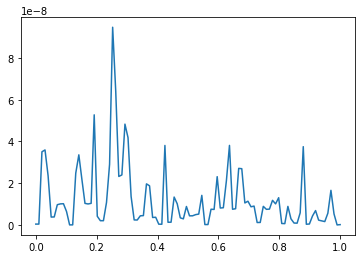

In [153]:
xx=np.linspace(0,1,N)
yy=[]
for i in range(0,N):
    print(i, grid[i])
    yy.append(grid[i])
plt.plot(xx, yy)
plt.show()

In [ ]:
print(z1)
print(data[700429][1])

In [96]:
print(j)

70


In [52]:
print(i)

187


In [73]:
print(data[i][2 + 3*47])

0.7280212046237483
